In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [50]:
dataframe=pd.read_csv('1645792390_cep1_dataset.csv')
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#data inspection,findings on the structure of the data, missing values, duplicates,etc.

In [ ]:
dataframe['ca'].unique()

In [7]:
dataframe[dataframe['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [8]:
dataframe.loc[dataframe['ca']==4,'ca']=np.NaN
dataframe['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [ ]:
dataframe['thal'].unique()

NameError: name 'dataframe' is not defined

In [11]:
dataframe.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [12]:
dataframe[dataframe['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [ ]:
dataframe.loc[dataframe['thal']==0,'thal']=np.NaN
dataframe['thal'].unique()

NameError: name 'np' is not defined

In [14]:
dataframe[dataframe['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [20]:
df = dataframe.fillna(dataframe.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
data1=dataframe.duplicated().sum()
if data1:
    print('Duplicates are:{}'.format(data1))
else:
    print('No Duplicates')
data1

Duplicates are:1


1

In [31]:
data1=dataframe[dataframe.duplicated(keep=False)]
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,NaN,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,NaN,2.0,1


In [47]:
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,298.000000,301.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.674497,2.328904,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.938202,0.584347,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


<AxesSubplot:xlabel='sex', ylabel='count'>

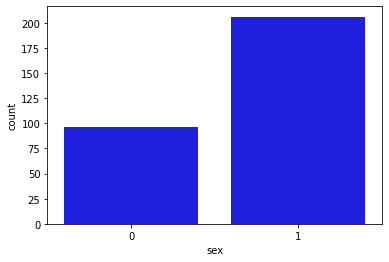

In [22]:
sns.countplot(data=data1,x='sex',color='blue')

<AxesSubplot:xlabel='sex', ylabel='count'>

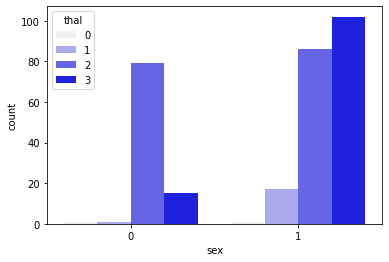

In [21]:
sns.countplot(data=data1,x='sex',hue='thal',color='blue')

<AxesSubplot:xlabel='sex', ylabel='count'>

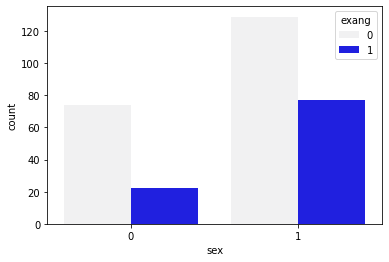

In [25]:
sns.countplot(data=data1,x='sex',hue='exang',color='blue')

<AxesSubplot:xlabel='sex', ylabel='count'>

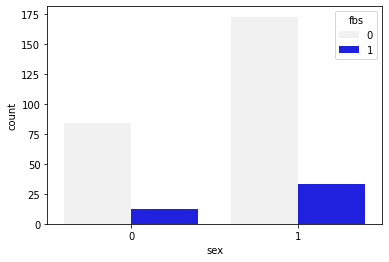

In [37]:
sns.countplot(data=data1,x='sex',hue='fbs',color='blue')

Text(0.5, 1.0, 'CVD across the Age')

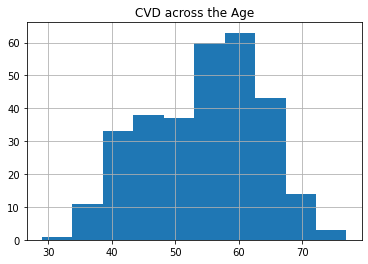

In [46]:
dataframe['age'].hist().plot(kind='bar')
plt.title('CVD across the Age')

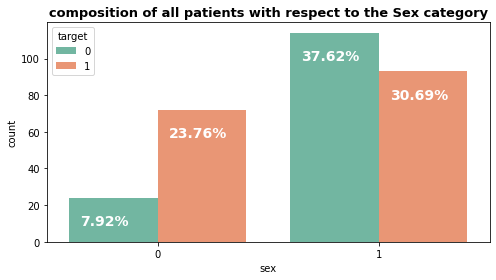

In [64]:
fig, px = plt.subplots(figsize=(7,4))
name = dataframe['sex']
px = sns.countplot(x='sex', hue='target', data=dataframe, palette='Set2')
px.set_title("composition of all patients with respect to the Sex category", fontsize = 13, weight = 'bold')
totals = []
for i in px.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in px.patches:
    px.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Text(0.5, 1.0, 'CVD attacks based on anomalies in the resting blood pressure')

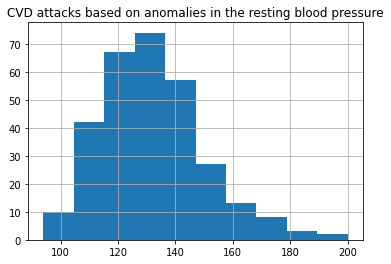

In [66]:
dataframe['trestbps'].hist().plot(kind='bar')
plt.title('CVD attacks based on anomalies in the resting blood pressure')

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


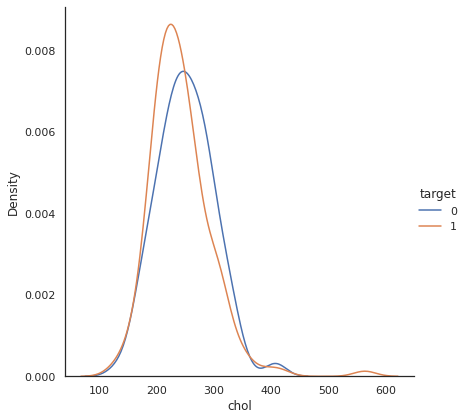

In [76]:
sns.FacetGrid(df, hue="target", size=6).map(sns.kdeplot, "chol").add_legend();

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


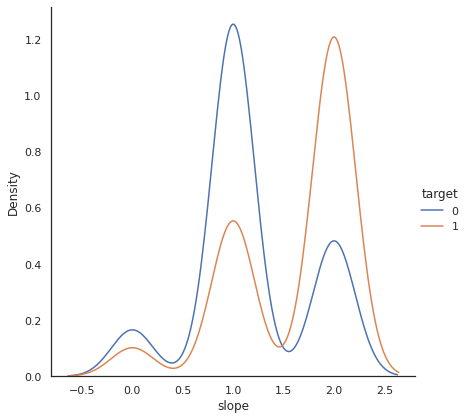

In [77]:
sns.FacetGrid(df, hue="target", size=6).map(sns.kdeplot, "slope").add_legend();

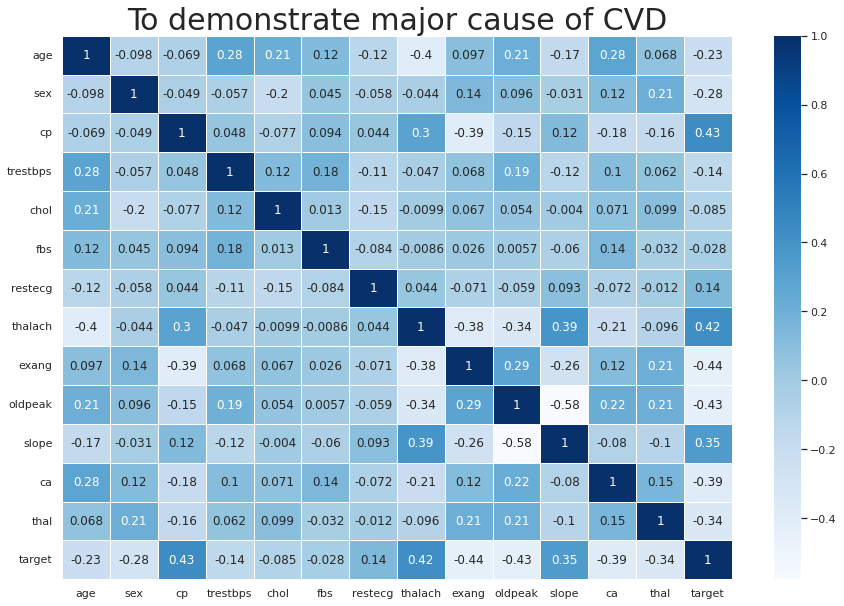

In [5]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(dataframe.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('To demonstrate major cause of CVD', fontsize = 30)
plt.show()

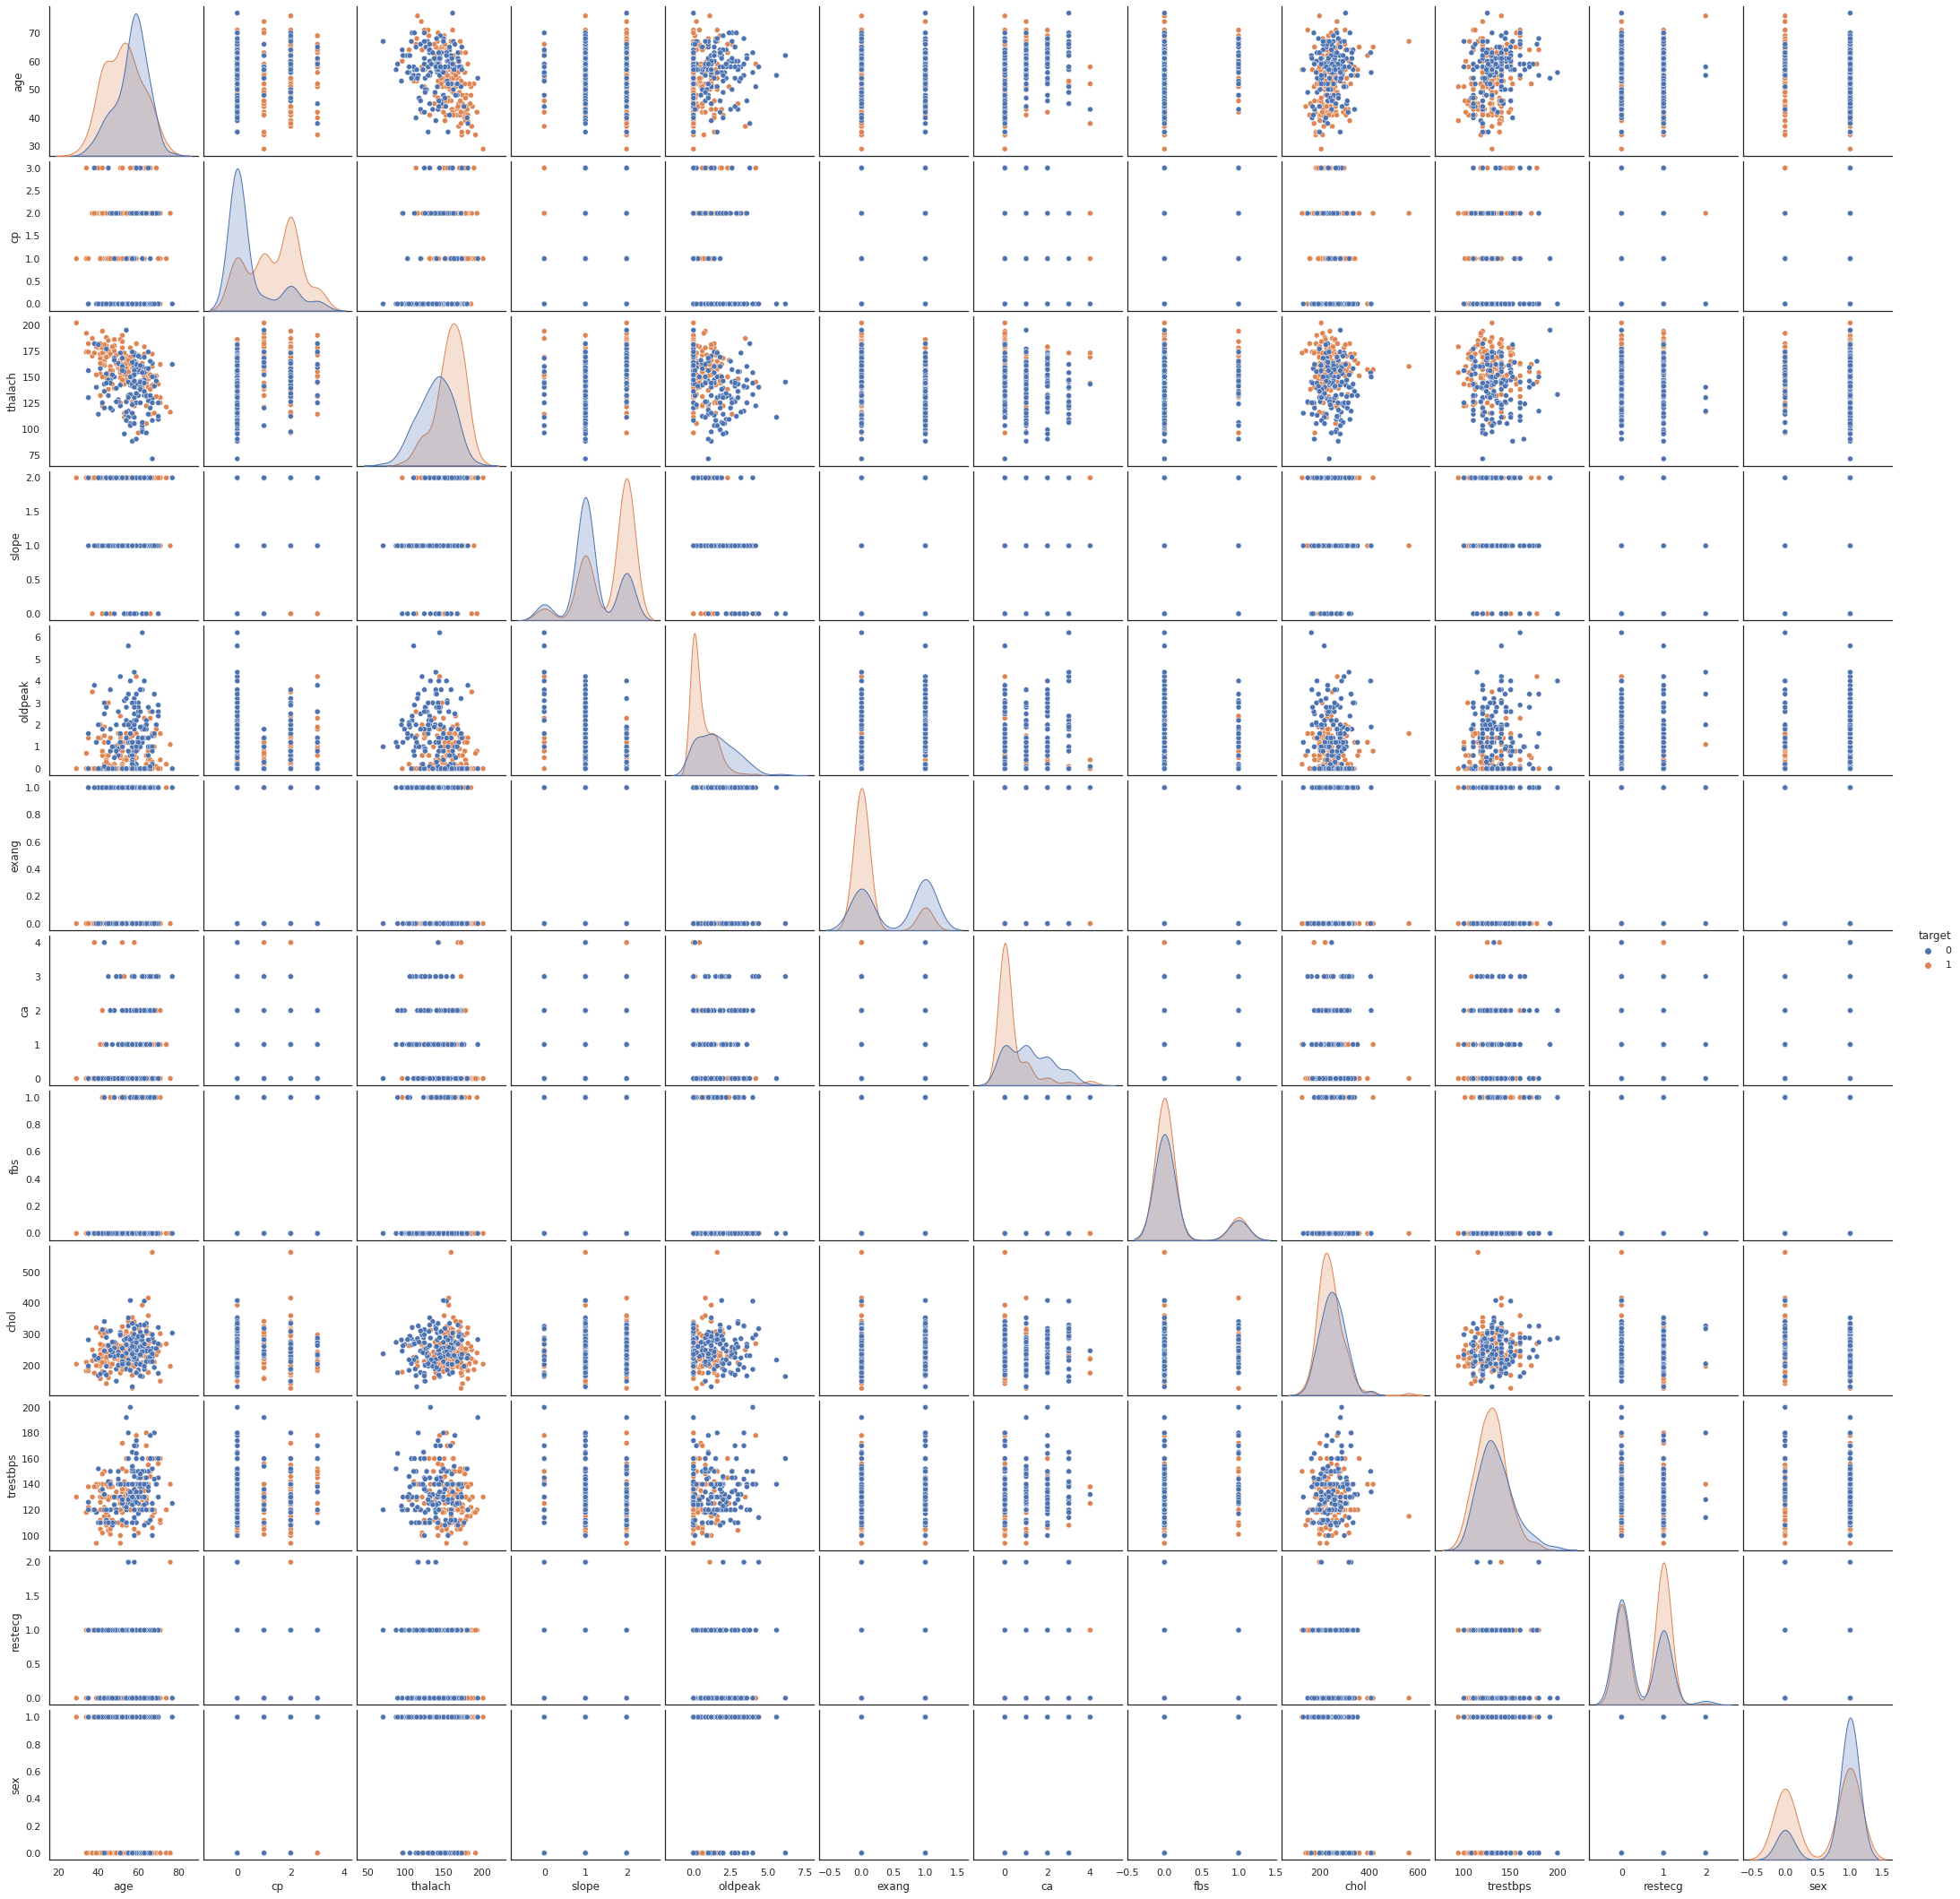

In [13]:
sns.pairplot(
    dataframe,
    x_vars=["age","cp", "thalach", "slope","oldpeak", "exang", "ca","fbs","chol", "trestbps", "restecg","sex"],
    y_vars=["age","cp", "thalach", "slope","oldpeak", "exang", "ca","fbs","chol", "trestbps", "restecg","sex"],hue="target")

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [20]:
x=dataframe.iloc[:,:-1]
y=dataframe.iloc[:,-1]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [24]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
y_pred

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [25]:
dataframe_predicted=pd.DataFrame()
dataframe_predicted['Actual']=y_test
dataframe_predicted['predicted']=y_pred
dataframe_predicted.head()

,Actual,predicted
225,0,0
152,1,1
228,0,1
201,0,0
52,1,0


In [26]:
mislabel=np.sum(y_test!=y_pred)
mislabel

12

In [27]:
len(y_test)

76

In [30]:
14/76

0.18421052631578946

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)*100

84.21052631578947

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
classifier1=RandomForestClassifier(n_estimators=50)
classifier1.fit(x_train,y_train)
classifier1

RandomForestClassifier(n_estimators=50)

In [41]:
y_pred=classifier1.predict(x_test)

In [42]:
result=confusion_matrix(y_test,y_pred)
print("confusion matrix:")
print(result)

confusion matrix:
[[25  8]
 [ 5 38]]


In [46]:
result1=classification_report(y_test,y_pred)
print("classification Report:")
print(result1)

classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.83      0.88      0.85        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



In [49]:
result2=accuracy_score(y_test,y_pred)
print('Accuracy is:',result2)

Accuracy is: 0.8289473684210527
